# Introduction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight

2025-02-25 09:44:25.207542: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-25 09:44:25.207668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-25 09:44:25.371805: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Dataset Overview

***Firstly,
MIT- Arrhythmia Dataset contains:
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
We read through pandas library .csv file to start processing on it,***

- ECG heartbeat classification can be used in real-time for arrhythmia detection. Arrhythmias are abnormal heart rhythms that can be dangerous. By classifying heartbeats in real-time, doctors can monitor patients for arrhythmias and intervene quickly if necessary.
- For instance, a device worn by a patient could use ECG heartbeat classification to monitor their heart rhythm for signs of arrhythmia. If an arrhythmia is detected, the device could alert the patient or their doctor, and also for driver detection of fatigue using ecg sensor or smartwatch.

In [3]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv',header=None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv',header=None)

# Exploratory Data Analysis (EDA)

***let's show the training data to know what it contains how many rows & columns***

In [24]:
display(train_df)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


***let's show the test data to know what it contains how many rows & columns***

In [4]:
display(test_df)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


***We get the unique values from the last column that contains all classes and our target, and rename it to become more clear and clarifiable***

In [5]:
# Assuming the target column is the last column
target_column_index = train_df.shape[1] - 1

# Get the unique values in the target column
class_labels = train_df[target_column_index].unique()

# Assign meaningful names to the class labels based on domain knowledge
class_names = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

# Print class labels with their assigned names
for label in class_labels:
    print(f"Class label {label}: {class_names[label]}")

Class label 0.0: Normal Beats
Class label 1.0: Supraventricular Ectopy Beats
Class label 2.0: Ventricular Ectopy Beats
Class label 3.0: Fusion Beats
Class label 4.0: Unclassifiable Beats


***See if there's missing values in the dataset, by seeing the NaN and average mean but all of the columns have a numbers because its contains of reads in every row at the end of column numbers it captures the electrical activity of your heart over time, ECG datasets are typically large and formatted with multiple leads (channels) capturing electrical activity from different angles of the heart.***

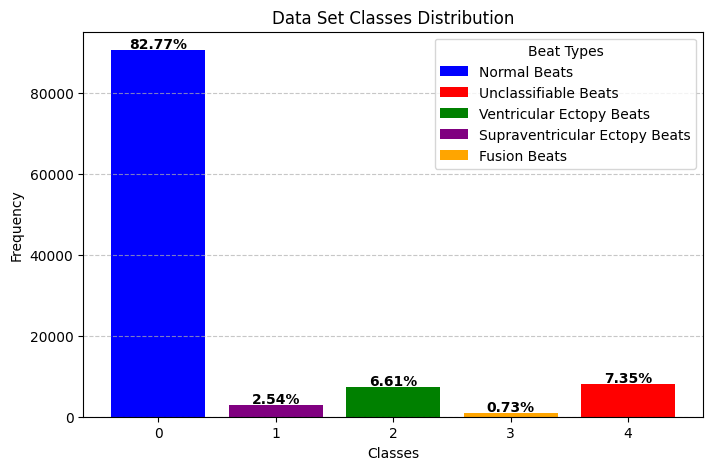

In [6]:
# Get value counts
data = train_df[187].value_counts() + test_df[187].value_counts()

# Class labels mapping p/s below im using genAi to analyses the dataset 
label_mapping = {
    0: "Normal Beats",
    1: "Supraventricular Ectopy Beats",
    2: "Ventricular Ectopy Beats",
    3: "Fusion Beats",
    4: "Unclassifiable Beats"
}

# Define distinct colors for each class
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Compute percentages
total = data.sum()
percentages = (data / total) * 100

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(data.index.astype(int), data.values, color=colors)

# Add percentage labels above bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f"{percentage:.2f}%", 
             ha='center', fontsize=10, fontweight='bold', color='black')

# Add legend with class names and matching colors
plt.legend(bars, [label_mapping[int(c)] for c in data.index], title="Beat Types")

# Labels and title
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Data Set Classes Distribution")
plt.xticks(data.index.astype(int))  # Ensure correct x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [7]:
df_1 = train_df[train_df[187] == 1]
df_2 = train_df[train_df[187] == 2]
df_3 = train_df[train_df[187] == 3]
df_4 = train_df[train_df[187] == 4]

In [8]:
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 3112)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 3112)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 3112)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 3112)
df_0 = train_df[train_df[187]==0].sample(n =20000, random_state=3112)
train_df = pd.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])



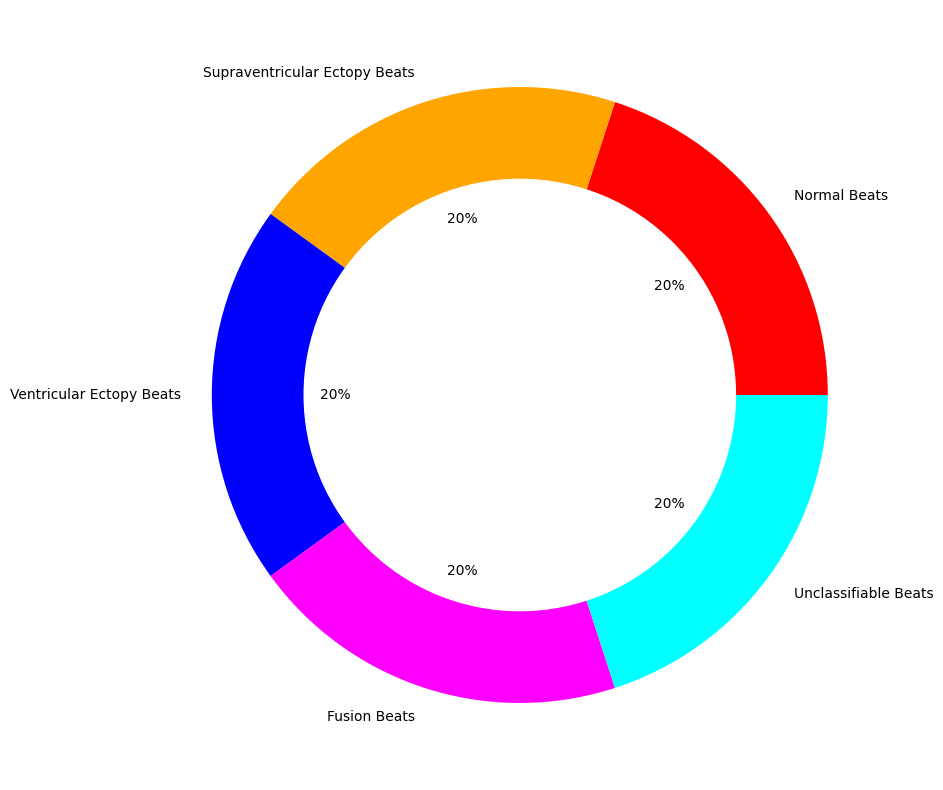

In [9]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(train_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [10]:
print(train_df[187].value_counts())
print(len(train_df[187].value_counts()))

187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64
5


In [11]:
df_1_t = test_df[test_df[187] == 1]
df_2_t = test_df[test_df[187] == 2]
df_3_t = test_df[test_df[187] == 3]
df_4_t = test_df[test_df[187] == 4]

In [12]:
from sklearn.utils import resample

df_1_upsample_t = resample(df_1, n_samples = 5000, replace = True, random_state = 123)
df_2_upsample_t = resample(df_2, n_samples = 5000, replace = True, random_state = 123)
df_3_upsample_t = resample(df_3, n_samples = 5000, replace = True, random_state = 123)
df_4_upsample_t = resample(df_4, n_samples = 5000, replace = True, random_state = 123)
df_0_t = test_df[test_df[187]==0].sample(n =5000, random_state=123)
test_df = pd.concat([df_0_t, df_1_upsample_t, df_2_upsample_t, df_3_upsample_t, df_4_upsample_t])



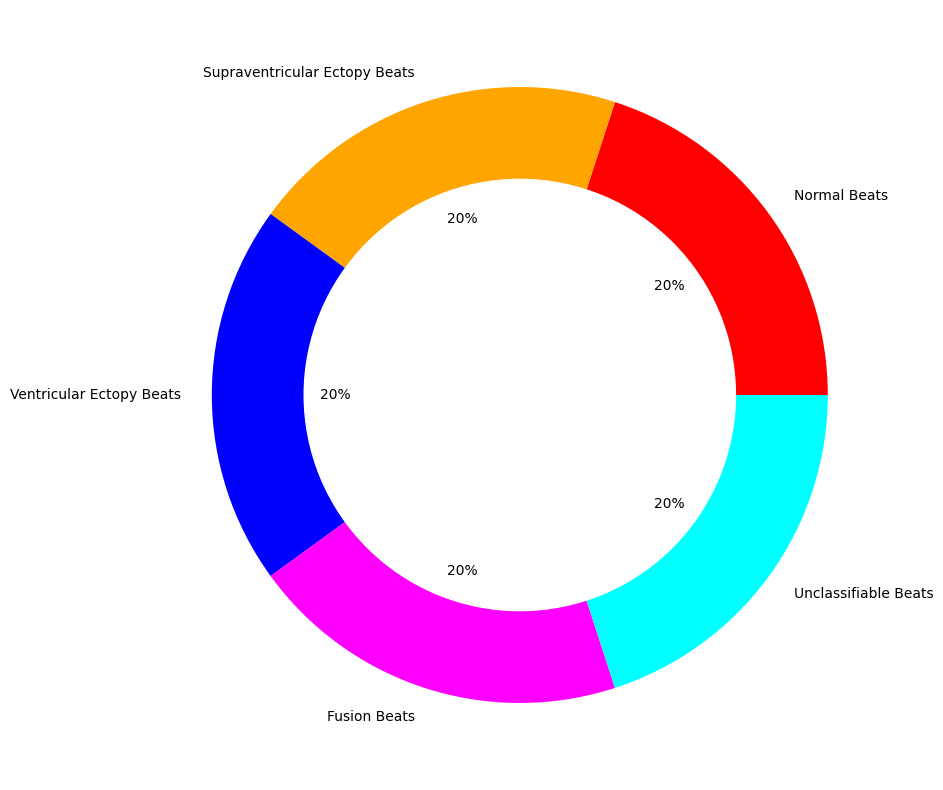

In [13]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white') 
plt.pie(test_df[187].value_counts(), labels=['Normal Beats','Supraventricular Ectopy Beats','Ventricular Ectopy Beats','Fusion Beats','Unclassifiable Beats'], autopct = '%0.0f%%', colors = ['red','orange','blue','magenta','cyan'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Preprocessing

***With Last column (188) index -1, is the features that contains all classes, we split it into features and labels on the training dataset***

In [14]:
X_train = train_df.drop(columns = [187])
y_train = train_df[187]

📌 Giải thích từng phần
🔹 Lý do cần lọc thông thấp (low-pass filtering)?
Giảm nhiễu tần số cao

Tín hiệu ECG thường bị ảnh hưởng bởi nhiễu từ môi trường, đặc biệt là nhiễu 50Hz/60Hz từ lưới điện.
Bộ lọc thông thấp giúp loại bỏ thành phần tần số cao này, giữ lại chỉ các tín hiệu quan trọng của ECG (thường nằm trong khoảng 0.5 - 40Hz).
Cải thiện độ chính xác khi trích xuất đặc trưng

Khi phân tích tín hiệu ECG (ví dụ: xác định nhịp tim hoặc sóng P, QRS, T), nhiễu có thể gây sai lệch.
Lọc giúp làm mượt tín hiệu, giúp thuật toán nhận diện chính xác hơn.
Giảm nhiễu cơ (EMG) và nhiễu điện sinh học khác

Hoạt động cơ bắp có thể tạo ra nhiễu tần số cao trong ECG.
Bộ lọc giúp loại bỏ những tín hiệu không mong muốn này.

In [15]:
from scipy.signal import butter, filtfilt

ecg_data = train_df
ecg_signal = X_train
class_labels = y_train
sampling_rate = 125
def butter_lowpass_filter(data, cutoff_freq, fs, order=5):
    nyquist_freq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Example usage:
cutoff_frequency = 50  # Define the cutoff frequency in Hz
filtered_ecg_signal = butter_lowpass_filter(ecg_signal, cutoff_frequency, sampling_rate)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Separate features and target variable for test dataset
X_test = test_df.drop(columns=[187])
y_test = test_df[187]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_normalized = scaler.fit_transform(X_train)
# Transform the valid data using the fitted scaler
X_valid_normalized = scaler.transform(X_valid)
# Transform the test data using the fitted scaler
X_test_normalized = scaler.transform(X_test)

print("Before Normalization:")
print(X_train.head(5))

print("After Normalization:")
print(X_train_normalized[:, 5])

Before Normalization:
            0         1         2         3         4         5         6    \
72519  0.000000  0.109375  0.275000  0.384375  0.490625  0.587500  0.675000   
84444  0.674277  0.575342  0.449011  0.324201  0.184170  0.111111  0.030441   
23309  1.000000  0.930070  0.489510  0.010490  0.000000  0.185315  0.262238   
72868  0.919282  0.852018  0.224215  0.000000  0.040359  0.098655  0.121076   
72959  0.991489  0.782979  0.144681  0.000000  0.106383  0.182979  0.140426   

            7         8         9    ...      177       178       179  \
72519  0.728125  0.746875  0.759375  ...  0.00000  0.000000  0.000000   
84444  0.030441  0.048706  0.118721  ...  0.00000  0.000000  0.000000   
23309  0.246504  0.241259  0.250000  ...  0.00000  0.000000  0.000000   
72868  0.165919  0.215247  0.174888  ...  0.29148  0.313901  0.327354   
72959  0.191489  0.255319  0.246809  ...  0.00000  0.000000  0.000000   

            180       181       182       183       184       18

***Shows the first 5 rows in data***

In [17]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
54572,0.972452,0.785124,0.289256,0.035813,0.049587,0.068871,0.019284,0.000000,0.008264,0.008264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45403,0.994595,0.936937,0.600000,0.430631,0.385586,0.365766,0.300901,0.270270,0.227027,0.190991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43722,0.921811,0.633745,0.144033,0.057613,0.098765,0.086420,0.053498,0.037037,0.020576,0.024691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65263,1.000000,0.980645,0.580645,0.178495,0.092473,0.126882,0.141935,0.133333,0.120430,0.131183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17172,1.000000,0.812834,0.454545,0.000000,0.136364,0.304813,0.371658,0.419786,0.374332,0.360963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Printing the shape of the training dataset after resampling it***

In [18]:
train_df.shape

(100000, 188)

***Printing the shape of the testing dataset after resampling it***

In [19]:
test_df.shape

(25000, 188)

# **Machine Learning Classifiers**

# Support Vector Machine (SVM) Model

In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create the SVM classifier
svm_classifier = svm.SVC(kernel='rbf', random_state=42)

# Train the classifier on the normalized training data
svm_classifier.fit(X_train_normalized, y_train)

# Make predictions on the normalized validation set
y_pred_valid = svm_classifier.predict(X_valid_normalized)

# Calculate accuracy on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print("Validation Accuracy:", accuracy_valid)

# Make predictions on the normalized test set
y_pred_test = svm_classifier.predict(X_test_normalized)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Validation Accuracy: 0.93475
Test Accuracy: 0.93668


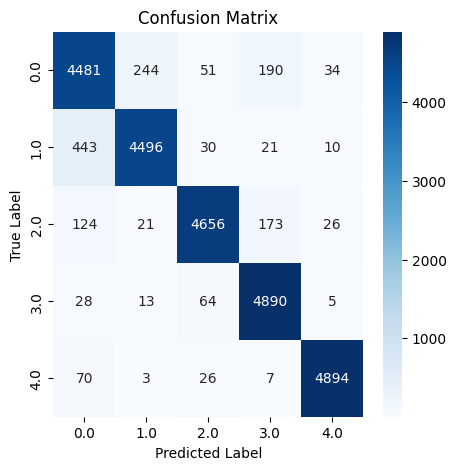

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Dự đoán trên tập test
y_pred_test = svm_classifier.predict(X_test_normalized)

# Tạo confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Vẽ confusion matrix bằng heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# **Deep Learning Models**

# Feedforward Neural Network (FNN) Model

***Feedforward Neural Network, is a fundamental type of artificial neural network architecture characterized by the unidirectional flow of information, which is a basic model that contains an input, optional hidden, and output layers.***

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

# Create the FNN model
FNN_model = Sequential()

# Add the first hidden layer with input shape 187
FNN_model.add(Dense(512, activation='relu', input_shape=(187,)))
#FNN_model.add(Dropout(0.3)) # Add dropout layer with dropout rate 0.5

# Add the second hidden layer
FNN_model.add(Dense(512, activation='relu'))
FNN_model.add(Dropout(0.1)) # Add dropout layer with dropout rate 0.1


# Add the output layer
FNN_model.add(Dense(5, activation='softmax'))

# Compile the model
FNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Print the model summary
FNN_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        96,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,477 (1.38 MB)

 Trainable params: 361,477 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

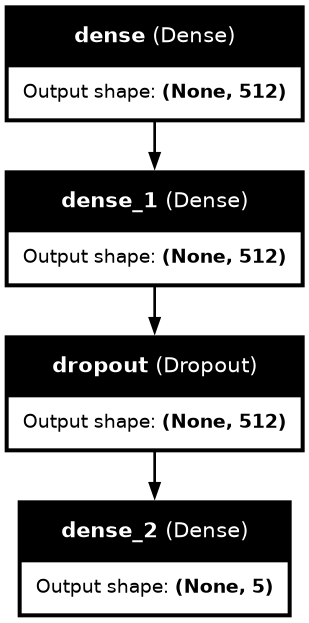

In [25]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(FNN_model, to_file='FNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

***By parameterizing and reach the best possible layers in the model we run the epochs which the number of iterations on our data to see its accuracy, loss.***

In [26]:
# Fit the model
history_FNN = FNN_model.fit(X_train_normalized, y_train,
                    epochs=150,  # number of epochs
                    batch_size=128,  # batch size
                    validation_data=(X_valid_normalized, y_valid),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
loss, accuracy = FNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/150
 98/500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.7392

I0000 00:00:1740478189.319291     133 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1740478189.330158     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8224 - loss: 0.4817 - val_accuracy: 0.9271 - val_loss: 0.2014
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9308 - loss: 0.1915 - val_accuracy: 0.9518 - val_loss: 0.1468
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9538 - loss: 0.1331 - val_accuracy: 0.9599 - val_loss: 0.1154
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.1062 - val_accuracy: 0.9551 - val_loss: 0.1323
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.0853 - val_accuracy: 0.9726 - val_loss: 0.0872
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0703 - val_accuracy: 0.9766 - val_loss: 0.0781
Epoch 7/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9790 - loss: 0.0645 - val_accuracy: 0.9786 - val_loss: 0.0705
Epoch 8/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0553 - val_accuracy: 0.9773

W0000 00:00:1740478216.871265     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9877 - loss: 0.0535
Validation Loss: 0.052869729697704315
Validation Accuracy: 0.9867500066757202


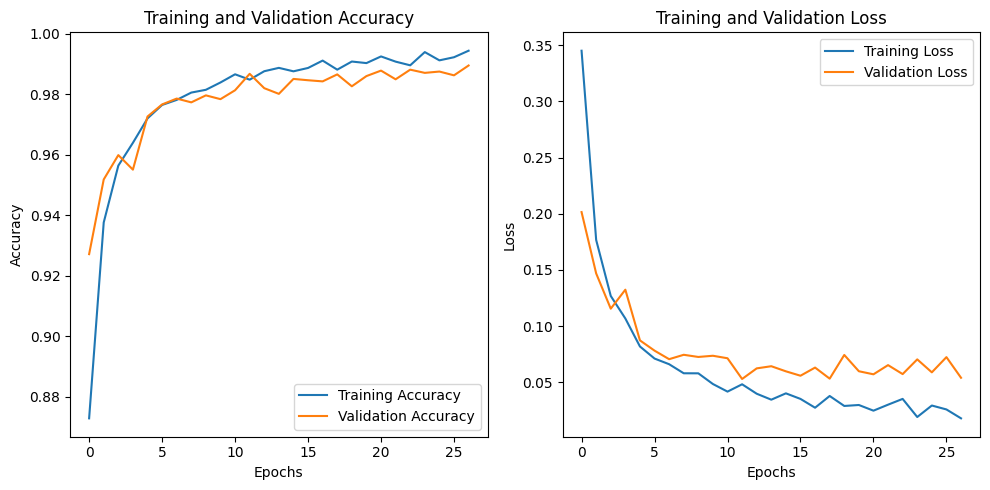

In [42]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_FNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_FNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_FNN.history['loss'], label='Training Loss')
plt.plot(history_FNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


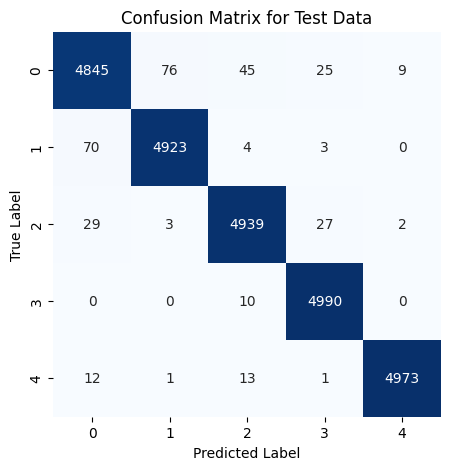

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob = FNN_model.predict(X_test_normalized)
y_pred_test_classes = np.argmax(y_pred_test_prob, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot = encoder.fit_transform(y_test_reshaped)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


***Visualizing it but with perecentages***

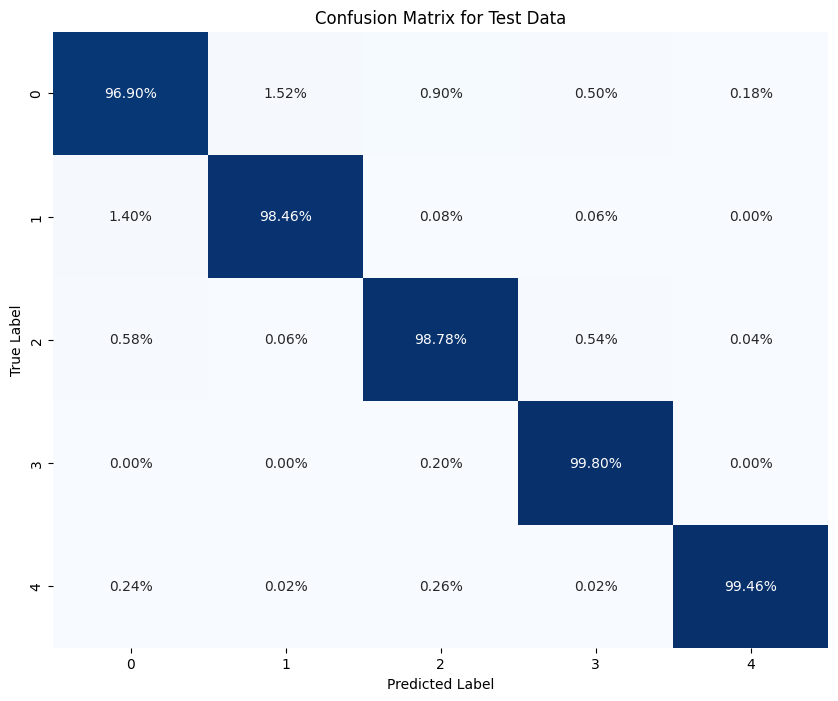

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes, y_pred_test_classes)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes, y_pred_test_classes)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.99


# Long Short-Term Memory (LSTM) Model

***An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory. RNN works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.***

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

def create_RNN_model():
    RNN_model = Sequential([
        LSTM(64, input_shape=(187,1), return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dense(128, activation='relu'),
        Dropout(0.1),  # Adding dropout for regularization
        Dense(5, activation='softmax')
    ])
    # Compile the model
    RNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return RNN_model


# Create the RNN model
RNN_model = create_RNN_model()


# Print the model summary
RNN_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 187, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 187, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,885 (230.02 KB)

 Trainable params: 58,885 (230.02 KB)

 Non-trainable params: 0 (0.00 B)

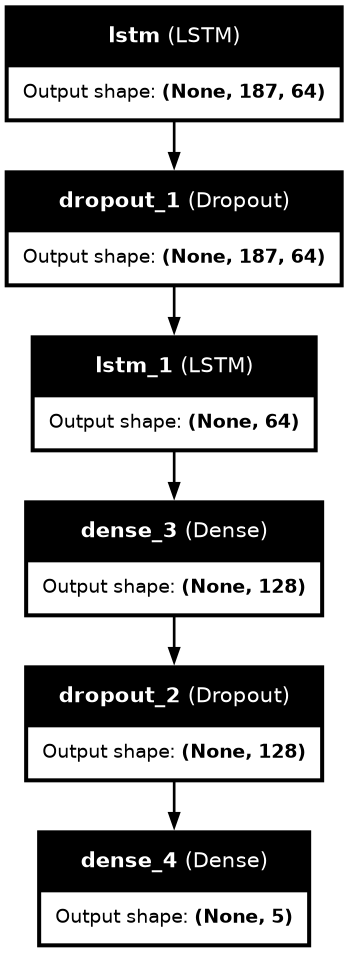

In [33]:
from tensorflow.keras.utils import plot_model

# Plot model with colored border
plot_model(RNN_model, to_file='RNN_model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
# Train the model
history_RNN = RNN_model.fit(X_train_normalized.reshape(-1, 187, 1), y_train, epochs=150, batch_size=128, validation_data=(X_valid_normalized, y_valid), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = RNN_model.evaluate(X_valid_normalized, y_valid)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


Epoch 1/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4356 - loss: 1.3056 - val_accuracy: 0.6076 - val_loss: 1.0076
Epoch 2/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5829 - loss: 1.0555 - val_accuracy: 0.5966 - val_loss: 1.0365
Epoch 3/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6260 - loss: 0.9671 - val_accuracy: 0.6685 - val_loss: 0.8781
Epoch 4/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5174 - loss: 1.1737 - val_accuracy: 0.6217 - val_loss: 0.9965
Epoch 5/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6116 - loss: 0.9938 - val_accuracy: 0.6024 - val_loss: 1.0146
Epoch 6/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6150 - loss: 1.0125 - val_accuracy: 0.6589 - val_loss: 0.9221
Epoch 7/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6347 - loss: 0.9733 - val_accuracy: 0.4294 - val_loss: 1.3163
Epoch 8/150
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4265 - loss: 1.3383 -

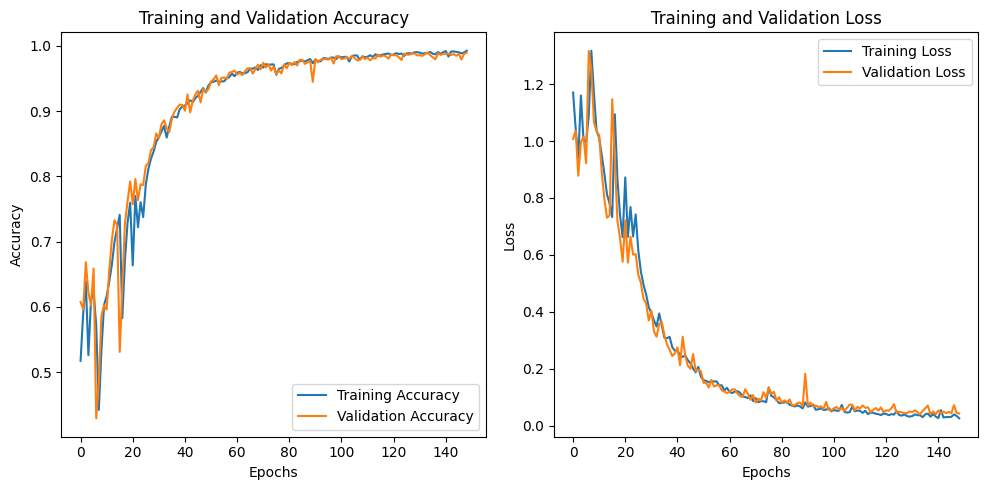

In [46]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_RNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['loss'], label='Training Loss')
plt.plot(history_RNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


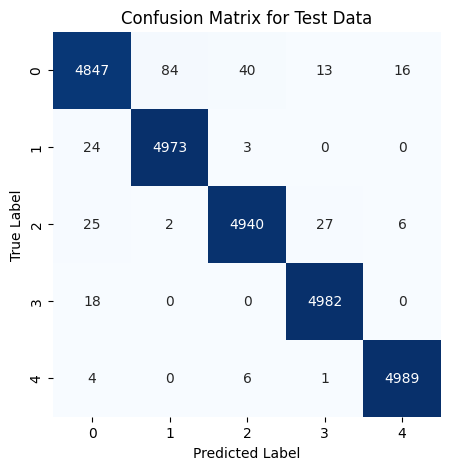

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Make predictions on the test data
y_pred_test_prob_RNN = RNN_model.predict(X_test_normalized)
y_pred_test_classes_RNN = np.argmax(y_pred_test_prob_RNN, axis=1)  # Convert probabilities to class labels

# Initialize OneHotEncoder
encoder_rnn = OneHotEncoder(sparse=False)

# Reshape y_test to a 2D array (required by OneHotEncoder)
y_test_reshaped_RNN = y_test.to_numpy().reshape(-1, 1)

# Fit and transform y_test to one-hot encoded format
y_test_onehot_RNN = encoder_rnn.fit_transform(y_test_reshaped_RNN)

# Convert one-hot encoded labels to single integer labels for y_test
y_test_classes_RNN = np.argmax(y_test_onehot_RNN, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes_RNN, y_pred_test_classes_RNN)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

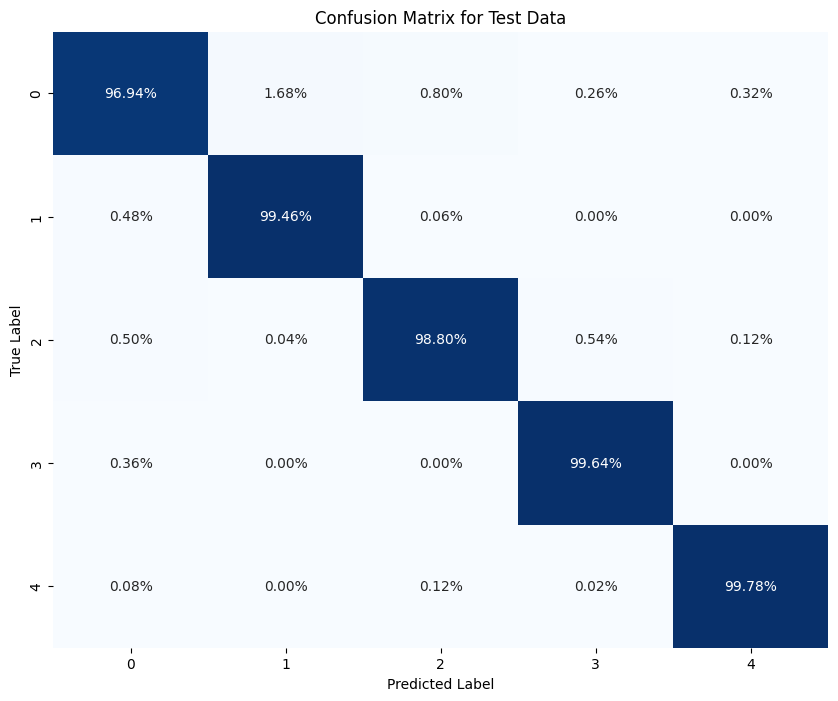

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix as before
conf_matrix = confusion_matrix(y_test_classes_RNN, y_pred_test_classes_RNN)

# Compute percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix with percentages
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
from sklearn.metrics import accuracy_score

# Compute accuracy
test_accuracy = accuracy_score(y_test_classes_RNN, y_pred_test_classes_RNN)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.99


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test_classes_RNN, y_pred_test_classes_RNN):
    accuracy = accuracy_score(y_test_classes_RNN, y_pred_test_classes_RNN)
    precision = precision_score(y_test_classes_RNN, y_pred_test_classes_RNN, average='micro')
    recall = recall_score(y_test_classes_RNN, y_pred_test_classes_RNN, average='micro')
    f1 = f1_score(y_test_classes_RNN, y_pred_test_classes_RNN, average='micro')
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

# Example usage:
evaluate_model(y_test_classes_RNN, y_pred_test_classes_RNN)

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99
